In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 01. Accessing the CIFAR 100 Data

In [2]:
 cifar100 = tf.keras.datasets.cifar100
 (X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(len(np.unique(y_train)))
print(X_train.shape[0] + X_test.shape[0])

(50000, 32, 32, 3)
(50000, 1)
100
60000


In the case of the CIFAR-100 we have 60,000 imgages with 100 different laybels
- each image has 3 color chanels & a resolution of 32x32 pixels

In [4]:
labels = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle",
          "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel",
          "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock",
          "cloud", "cockroach", "couch", "cra", "crocodile", "cup", "dinosaur",
          "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
          "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion",
          "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse",
          "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
          "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
          "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea",
          "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
          "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank",
          "telephone", "television", "tiger", "tractor", "train", "trout", "tulip",
          "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]

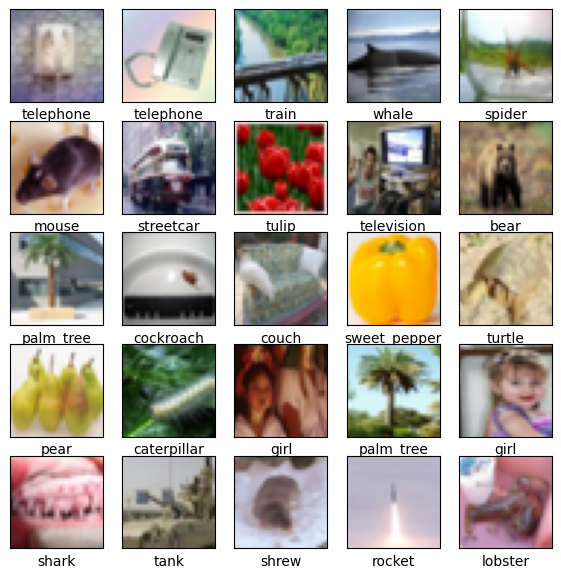

In [5]:
def show_some_sample_images(num_of_images=25):
    plt.figure(figsize=(7,7))

    for i in range(25):
        random_index = np.random.randint(0, len(X_train))
        plt.subplot(5, 5, i+1)                                # i+1: current position of the loop
        plt.xticks([])                                        # removes the numbers on the axes
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[random_index], cmap=plt.cm.binary)
        plt.xlabel(labels[y_train[random_index][0]])
    plt.show()

show_some_sample_images()

# 02. Preporcessing of the Dataset

In [6]:
def normalize_X(images):
  normalized_images = images.astype('float32')/255
  return normalized_images

X_train = normalize_X(X_train)
X_test = normalize_X(X_test)

In [7]:
# one hot encoding of the labels
y_train = tf.keras.utils.to_categorical(y_train)      # preferred in classification of images
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 100)


# 03. Convolutional NN

In [9]:
# ploting loss & accuracy

def loss_acc_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(epochs, loss, 'b', label='Training loss')
    ax1.plot(epochs, val_loss, 'r', label='Validation loss')
    ax1.set_title('Loss')
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend()

    ax2.plot(epochs, acc, 'b', label='Training acc')
    ax2.plot(epochs, val_acc, 'r', label='Validation acc')
    ax2.set_title('Accuracy')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend()

    plt.show()

### 03.1 Building simple/traditional model



In [10]:
from tensorflow.keras.losses import CategoricalCrossentropy    # becase we are dealing with one hot encoded labels
from tensorflow.keras.optimizers import Adam

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding="valid", activation='relu', input_shape=(32, 32, 3)),         # padding='same': would have added an even padding around the image
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(100, activation='linear')          # if activation not specified -> defined as linear
])

Metal device set to: Apple M2


2024-01-10 11:39:08.824525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-10 11:39:08.824641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(from_logits=True), run_eagerly=True, metrics=['acc'])

In [13]:
import time
training_start = time.time()

history = model.fit(X_train, y_train,
                    steps_per_epoch=100,
                    #batch_size= 64,      # allows more frequent updates -> 128, 265: more memory but smoother optimization process
                    epochs=100,           # not too large to prevent overfitting
                    validation_split=0.2)

training_stop = time.time()
training_time = training_stop - training_start

Epoch 1/100


2024-01-10 11:39:10.460863: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100/100 [==============================] - 12s 119ms/step - loss: 4.4046 - acc: 0.0284 - val_loss: 4.2077 - val_acc: 0.0581
Epoch 2/100
100/100 [==============================] - 12s 117ms/step - loss: 4.0450 - acc: 0.0780 - val_loss: 3.8840 - val_acc: 0.1067
Epoch 3/100
100/100 [==============================] - 12s 117ms/step - loss: 3.7984 - acc: 0.1192 - val_loss: 3.7247 - val_acc: 0.1327
Epoch 4/100
100/100 [==============================] - 12s 117ms/step - loss: 3.6205 - acc: 0.1482 - val_loss: 3.5884 - val_acc: 0.1582
Epoch 5/100
100/100 [==============================] - 12s 117ms/step - loss: 3.4883 - acc: 0.1706 - val_loss: 3.4896 - val_acc: 0.1729
Epoch 6/100
100/100 [==============================] - 12s 118ms/step - loss: 3.3811 - acc: 0.1877 - val_loss: 3.4086 - val_acc: 0.1814
Epoch 7/100
100/100 [==============================] - 12s 118ms/step - loss: 3.2901 - acc: 0.2032 - val_loss: 3.2877 - val_acc: 0.2089
Epoch 8/100
100/100 [==============================] - 12s 1

In [14]:
print(f"Training time: {training_time}")

Training time: 1209.2538387775421


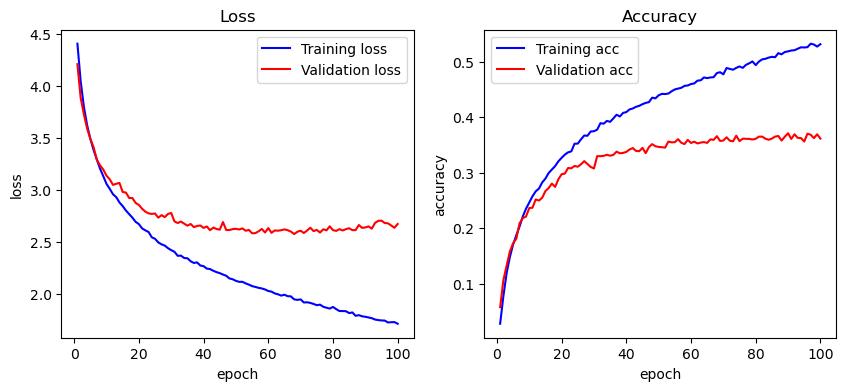

In [15]:
loss_acc_plot(history)

### 03.2 Finetuning of the architecture & extending of the simple model with dropout layers and data augmentation

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_train, y_train, test_size=0.2, random_state=420)

train_datagen = ImageDataGenerator(
    rotation_range=25,                # enables the rotations from -25 to 25 degrees
    width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True,
)

train_datagen.fit(X_train_2)

In [18]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding="same", activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100)      
])

In [19]:
model_2.compile(optimizer=Adam(), loss=CategoricalCrossentropy(from_logits=True), run_eagerly=True, metrics=['acc'])

In [20]:
training_start = time.time()

history_2 = model_2.fit(train_datagen.flow(X_train_2, y_train_2, batch_size=64),      # generated images: '#X_train_2'*'batch_size'*'epochs' = X_train*64*100
                        steps_per_epoch=100, 
                        epochs=200,
                        validation_data=(X_valid_2, y_valid_2))

training_stop = time.time()
training_time = training_stop - training_start

Epoch 1/200
100/100 [==============================] - 8s 81ms/step - loss: 4.6016 - acc: 0.0108 - val_loss: 4.5466 - val_acc: 0.0112
Epoch 2/200
100/100 [==============================] - 8s 80ms/step - loss: 4.4768 - acc: 0.0161 - val_loss: 4.4080 - val_acc: 0.0203
Epoch 3/200
100/100 [==============================] - 8s 79ms/step - loss: 4.3618 - acc: 0.0248 - val_loss: 4.3404 - val_acc: 0.0318
Epoch 4/200
100/100 [==============================] - 8s 80ms/step - loss: 4.2694 - acc: 0.0327 - val_loss: 4.2136 - val_acc: 0.0465
Epoch 5/200
100/100 [==============================] - 8s 80ms/step - loss: 4.1513 - acc: 0.0556 - val_loss: 4.0614 - val_acc: 0.0622
Epoch 6/200
100/100 [==============================] - 8s 80ms/step - loss: 4.0291 - acc: 0.0730 - val_loss: 3.9578 - val_acc: 0.0777
Epoch 7/200
100/100 [==============================] - 8s 79ms/step - loss: 3.9459 - acc: 0.0811 - val_loss: 3.8888 - val_acc: 0.0867
Epoch 8/200
100/100 [==============================] - 8s 80ms

In [21]:
print(f"Training time: {training_time}")

Training time: 1601.4565749168396


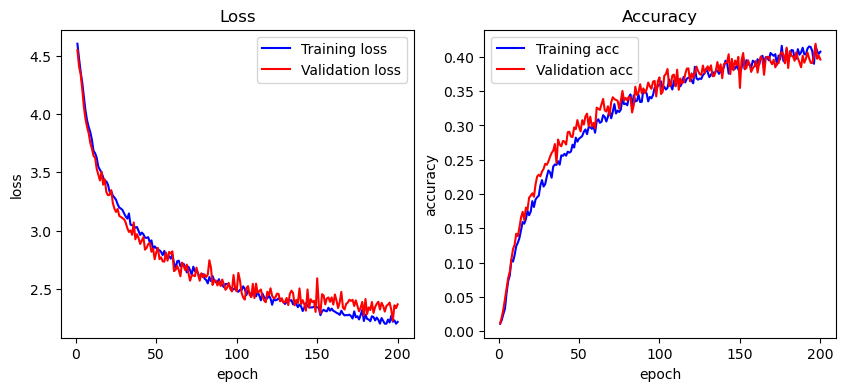

In [22]:
loss_acc_plot(history_2)

### 03.3 Further finetuning of the architecture 

In [23]:
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_train, y_train, test_size=0.2, random_state=420)

train_datagen = ImageDataGenerator(
                    rotation_range=15,  # rotates image randomly in range -15 to 15 degree
                    width_shift_range=0.1,  # shifts image randomly on horizontal axis 
                    height_shift_range=0.1,  # shifts image randomly on vertical axis 
                    horizontal_flip=True)  # randomly flips image horizontally
train_datagen.fit(X_train_3)

In [24]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, 3, padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(512, 3, padding="same", activation='relu'),
    tf.keras.layers.Conv2D(512, 3, padding="same", activation='relu'),
    tf.keras.layers.Conv2D(512, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100)      
])

print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 256)       590080    
                                                      

In [25]:
model_3.compile(loss=CategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate = 0.0001, decay = 1e-6), metrics=['acc'])

In [26]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

training_start = time.time()

history_3 = model_3.fit(train_datagen.flow(X_train_3, y_train_3, batch_size=50), 
                   steps_per_epoch=X_train_3.shape[0] // 50,
                   epochs=50,
                   validation_data=(X_valid_3, y_valid_3),
                   verbose=1,
                   callbacks=[early_stop])

training_stop = time.time()
training_time = training_stop - training_start

Epoch 1/50


2024-01-10 12:26:03.206914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - ETA: 0s - loss: 4.3506 - accuracy: 0.0318

2024-01-10 12:27:50.976477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - 117s 146ms/step - loss: 4.3506 - accuracy: 0.0318 - val_loss: 3.9830 - val_accuracy: 0.0793
Epoch 2/50
800/800 [==============================] - 141s 176ms/step - loss: 3.8324 - accuracy: 0.1047 - val_loss: 3.4757 - val_accuracy: 0.1702
Epoch 3/50
800/800 [==============================] - 151s 188ms/step - loss: 3.4488 - accuracy: 0.1743 - val_loss: 3.1841 - val_accuracy: 0.2259
Epoch 4/50
800/800 [==============================] - 149s 186ms/step - loss: 3.1741 - accuracy: 0.2221 - val_loss: 2.9729 - val_accuracy: 0.2752
Epoch 5/50
800/800 [==============================] - 157s 196ms/step - loss: 2.9502 - accuracy: 0.2698 - val_loss: 2.7729 - val_accuracy: 0.3126
Epoch 6/50
800/800 [==============================] - 154s 193ms/step - loss: 2.7634 - accuracy: 0.3043 - val_loss: 2.6016 - val_accuracy: 0.3501
Epoch 7/50
800/800 [==============================] - 157s 196ms/step - loss: 2.5919 - accuracy: 0.3382 - val_loss: 2.4752 - val_accura

In [28]:
print(f"Training time: {training_time}")

Training time: 6532.701003074646


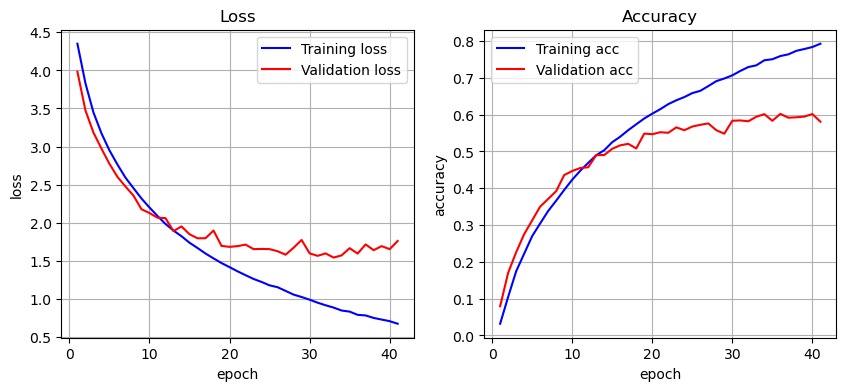

In [45]:
loss_acc_plot(history_3)